Importing our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Loading our data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

Displaying info about our data

In [3]:
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("Dataset info:")
print(df.info())

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("Features selected for clustering:")
print(X.head())
print("\nFeatures statistics:")
print(X.describe())

Dataset shape: (200, 5)

First few rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
N

We will now determine the optimal numbers of clustering

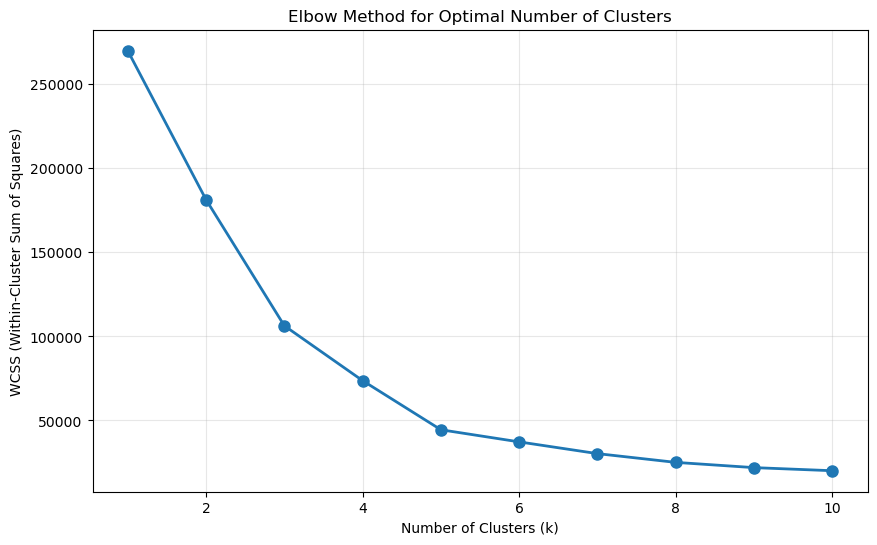

k = 1: WCSS = 269981.28
k = 2: WCSS = 181363.60
k = 3: WCSS = 106348.37
k = 4: WCSS = 73679.79
k = 5: WCSS = 44448.46
k = 6: WCSS = 37233.81
k = 7: WCSS = 30241.34
k = 8: WCSS = 25036.42
k = 9: WCSS = 21916.79
k = 10: WCSS = 20072.07


In [4]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))
plt.plot(k_range, wcss, marker = 'o', linestyle = '-', linewidth = 2, markersize = 8)
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True, alpha = 0.3)
plt.show()

for i, k in enumerate(k_range):
    print(f"k = {k}: WCSS = {wcss[i]:.2f}")

It is now time to apply our K-means cluster with the most optimal number of clusters

In [5]:
optimal_k = 5 # 5 is the most common and safest number to pick from the elbow method
kmeans = KMeans(n_clusters = optimal_k, random_state = 42, n_init = 10)
cluster_labels = kmeans.fit_predict(X)

df['Cluster'] = cluster_labels

print(f"K-Means clustering completed with {optimal_k} clusters\n")
print("Cluster distribution:")
print(df['Cluster'].value_counts().sort_index())

K-Means clustering completed with 5 clusters

Cluster distribution:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


It is time to create our K-Means graph!